In [122]:
library(tidyverse)
library(tidymodels)
#library(dplyr)
library(repr)

In [123]:
cleveland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/cleveland.data", col_names = FALSE, na = c("?"))
switzerland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/switzerland.data", col_names = FALSE, na = c("?"))
hungary <- read_delim("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/hungarian.data", col_names = FALSE, na = c("?", "-9"))
long_beach <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/long_beach.data", col_names = FALSE, na = c("?"))
#hungary
#switzerland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = F

In [139]:
cleveland_select <- cleveland |>
    select(X1, X5, X4, X8, X10, X14)
switzerland_select <- switzerland |>
    select(X1, X5, X4, X8, X10, X14)
hungary_select <- hungary |>
    select(X1, X5, X4, X8, X10, X14)
long_beach_select <- long_beach |>
    select(X1, X5, X4, X8, X10, X14)
column_names <- c("age", "serum_cholesterol", "resting_blood_pressure", "max_heart_rate", "old_peak", "heart_disease_present")
colnames(cleveland_select) <- column_names
colnames(switzerland_select) <- column_names
colnames(hungary_select) <- column_names
colnames(long_beach_select) <- column_names


all_places <- rbind(cleveland_select, switzerland_select) |>
    rbind(hungary_select) |>
    rbind(long_beach_select)
all_places$heart_disease_present[all_places$heart_disease_present >= 1] <- "Yes"
all_places$heart_disease_present[all_places$heart_disease_present == 0] <- "No"
all_places$serum_cholesterol[all_places$serum_cholesterol == 0] <- NA
all_places$resting_blood_pressure[all_places$resting_blood_pressure == 0] <- NA
all_places_select <- mutate(all_places, heart_disease_present = as_factor(heart_disease_present))

all_places_cleaned <- all_places_select |>
    filter(max_heart_rate != "NA") |>
    filter(old_peak != "NA") |>
    filter(resting_blood_pressure != "NA")


#hungary_select

In [140]:
set.seed(77777) 
places_split <- initial_split(all_places_cleaned, prop = 0.75, strata = heart_disease_present)
places_training <- training(places_split) 
places_testing <- testing(places_split) 



In [147]:
#places_training
avg <-  places_training |>
    select(-heart_disease_present) |>
    map_df(mean, na.rm = TRUE) |>
    mutate(serum_cholesterol_avg = serum_cholesterol, 
           resting_bp_avg = resting_blood_pressure,
           age_avg = age,
           max_heart_rate_avg = max_heart_rate,
           st_depression_avg = old_peak) |>
    select(serum_cholesterol_avg, resting_bp_avg, age_avg, max_heart_rate_avg, st_depression_avg)

count0 <- places_training |>
    filter(heart_disease_present == "No") |>
    count() |>
    pull()
count1 <- places_training |>
    filter(heart_disease_present == "Yes") |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_people_no_disease = count0) |>
    mutate(num_people_w_disease = count1)

#cleveland_training
avg
#count

serum_cholesterol_avg,resting_bp_avg,age_avg,max_heart_rate_avg,st_depression_avg,num_people_no_disease,num_people_w_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
244.369,133.252,53.15649,138.2426,0.8723005,291,348


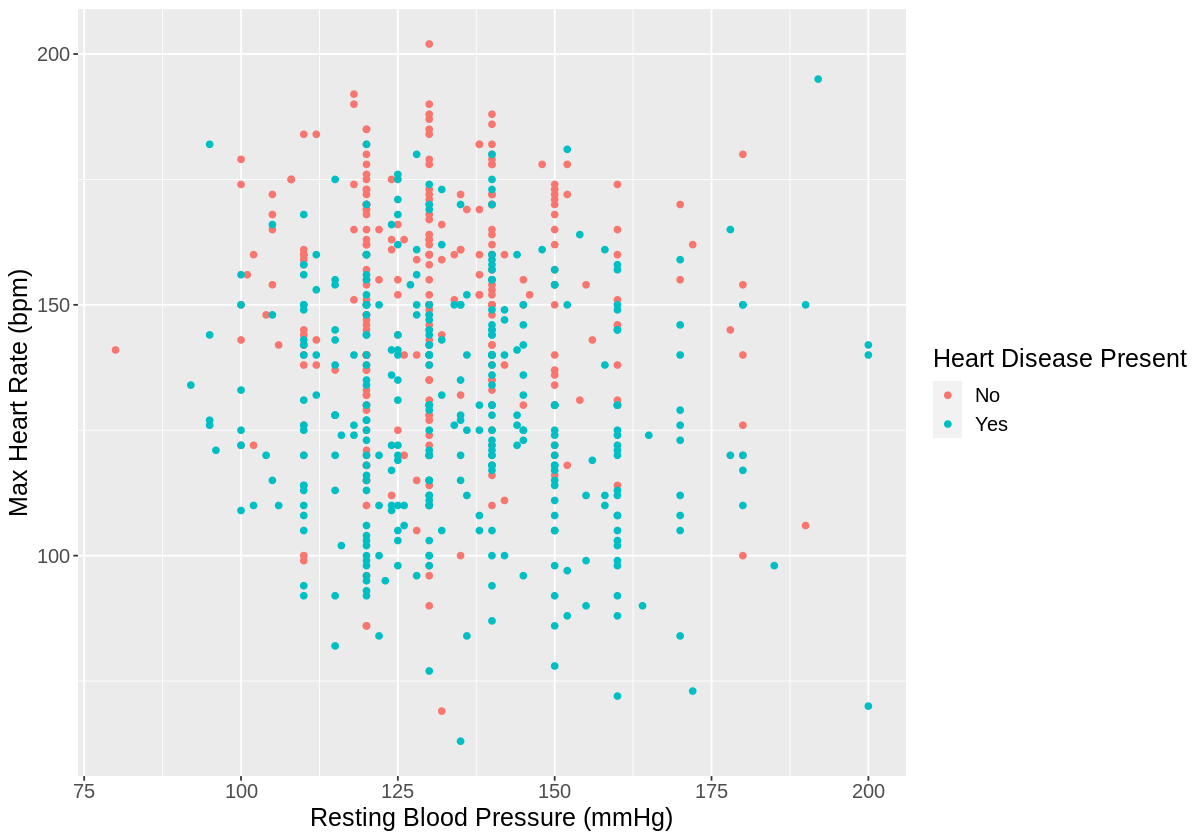

In [127]:
options(repr.plot.width = 10, repr.plot.height = 7)
distribution_plot <- ggplot(places_training, aes(x = resting_blood_pressure, y = max_heart_rate, colour = heart_disease_present)) +
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Max Heart Rate (bpm)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))

distribution_plot

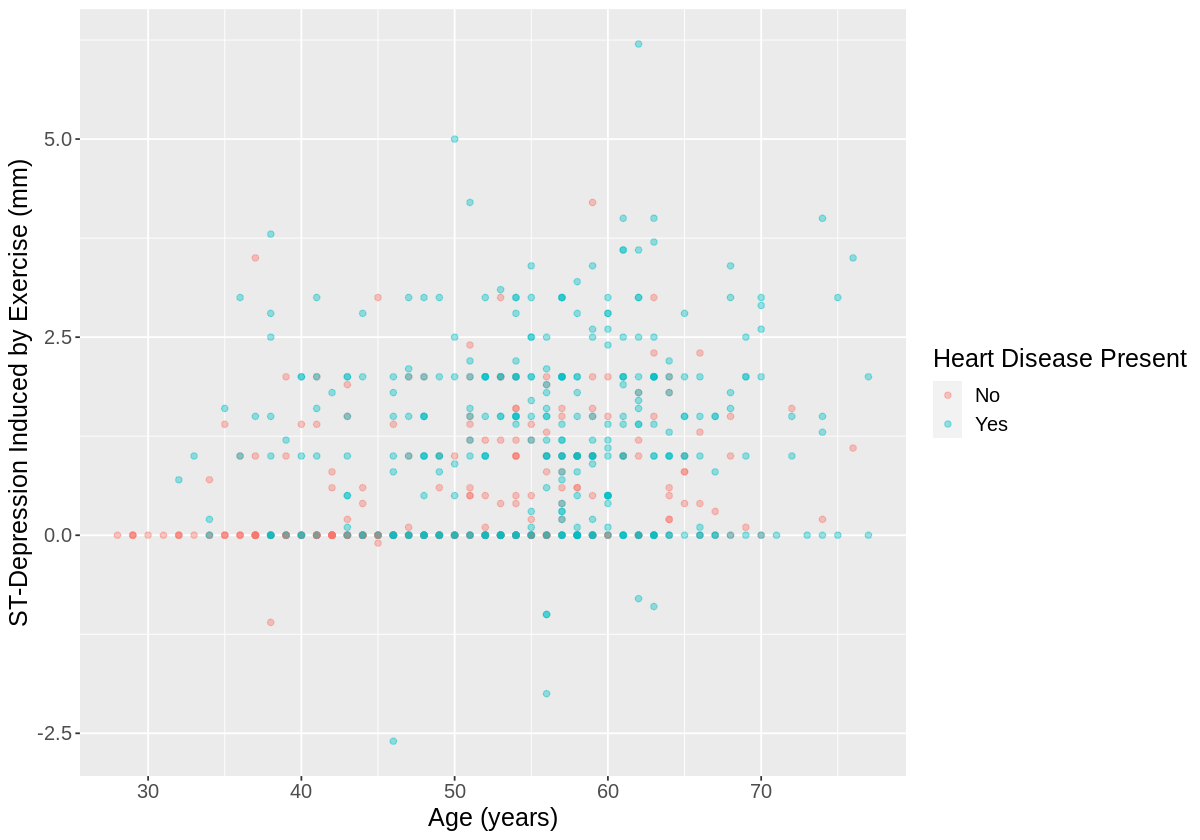

In [128]:
distribution_plot2 <- ggplot(places_training, aes(x = age, y = old_peak, colour = heart_disease_present)) +
    geom_point(alpha = 0.4) +
    xlab("Age (years)") +
    ylab("ST-Depression Induced by Exercise (mm)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))

distribution_plot2

Warning message:
“Removed 143 rows containing missing values (geom_point).”


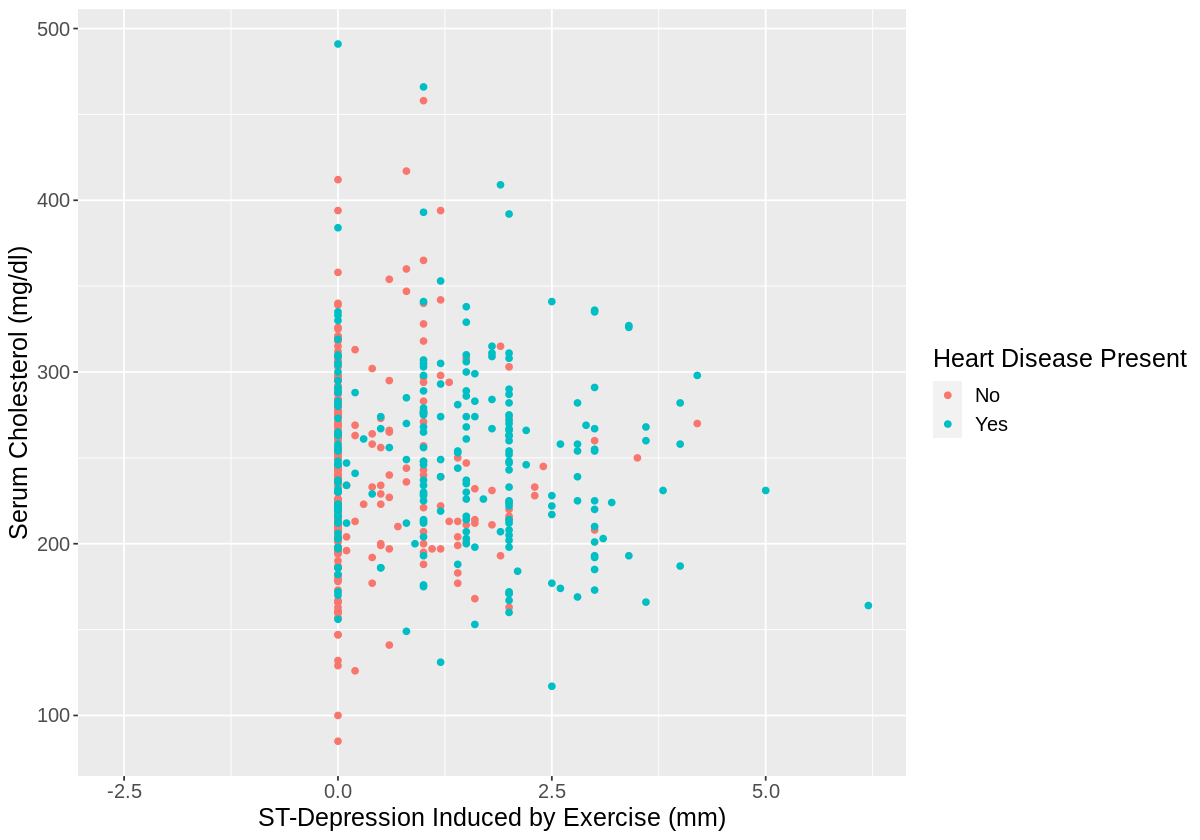

In [129]:
distribution_plot3 <- ggplot(places_training, aes(x = old_peak, y = serum_cholesterol, colour = heart_disease_present)) +
    geom_point() +
    xlab("ST-Depression Induced by Exercise (mm)") +
    ylab("Serum Cholesterol (mg/dl)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))

distribution_plot3

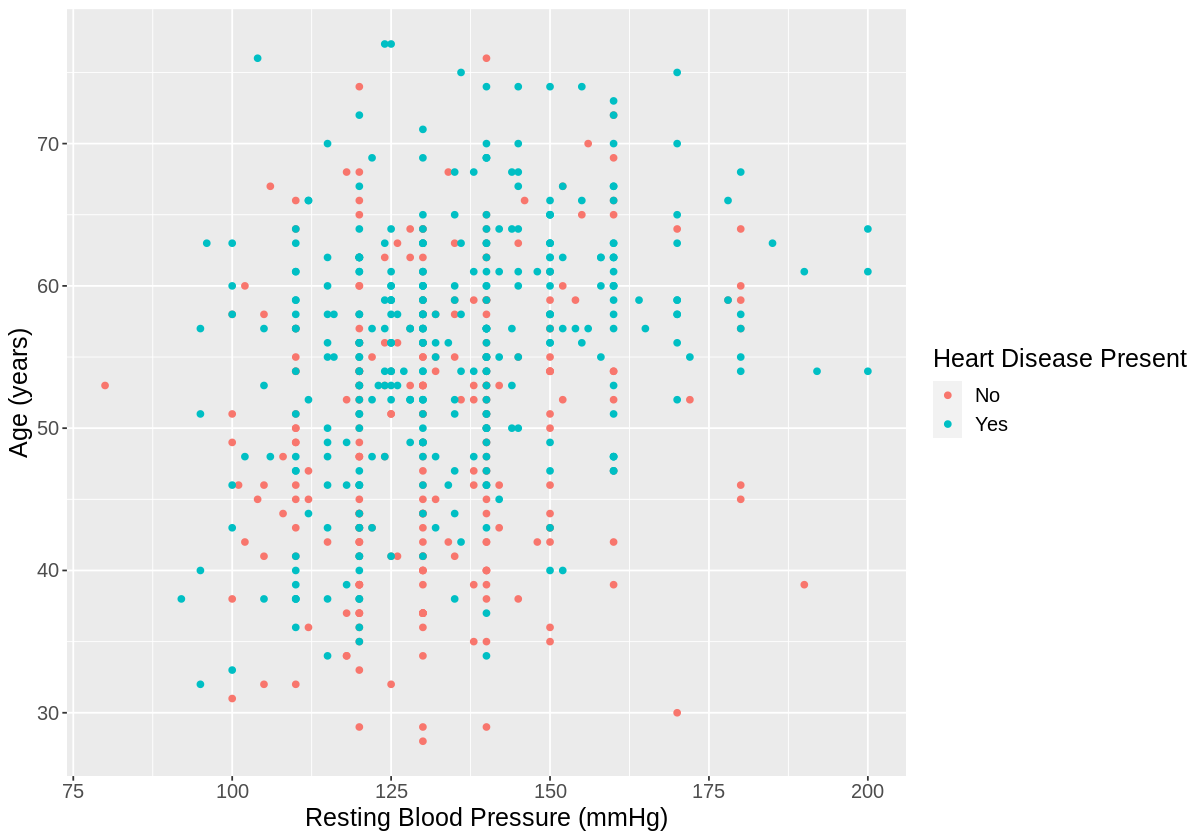

In [130]:
distribution_plot4 <- ggplot(places_training, aes(x = resting_blood_pressure, y = age, colour = heart_disease_present)) +
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Age (years)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))

distribution_plot4

In [131]:
#places_training
#heart_train_scaled <- places_training |>
    #mutate(across(where(is.numeric), scale))
#heart_train_scaled 
heart_recipe <- recipe(heart_disease_present ~ max_heart_rate + old_peak + age, data = places_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

In [132]:
ks <- tibble(neighbors = 1:50)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification") 
#knn_spec

In [133]:
set.seed(778)
heart_vfold <- vfold_cv(places_training, v = 5, strata = heart_disease_present)

In [148]:
set.seed(777)
heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = ks)


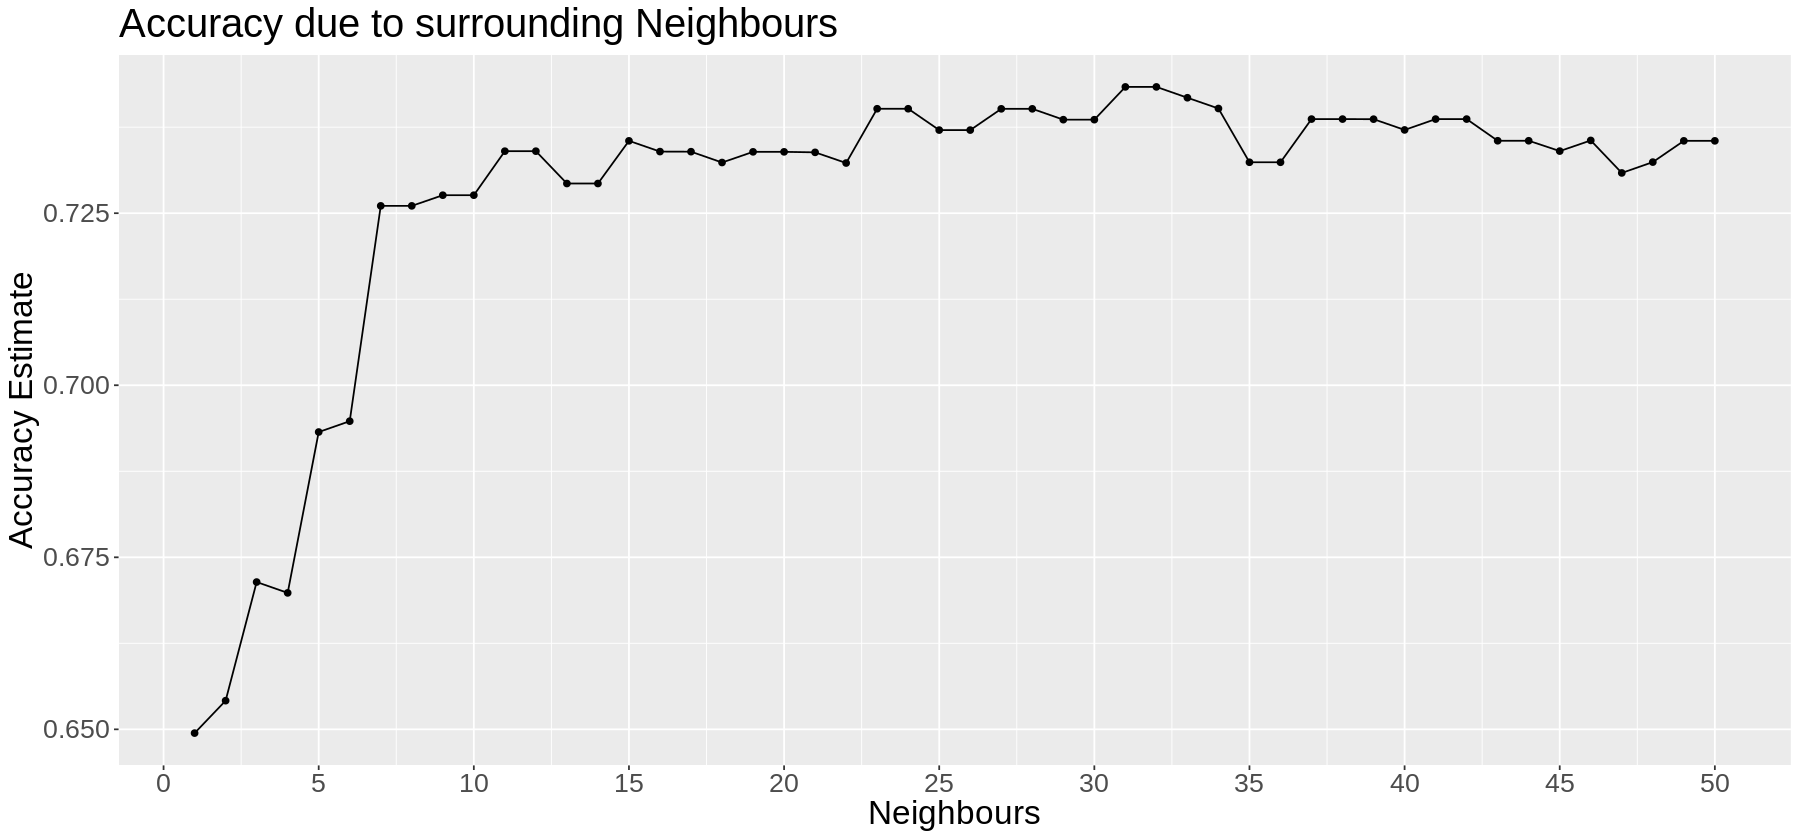

In [149]:
accuracy <- collect_metrics(heart_fit) |>
    filter(.metric == "accuracy")
#accuracy
options(repr.plot.width = 15, repr.plot.height = 7)
ideal_k <- accuracy |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() + 
    labs(x = "Neighbours", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = seq(0, 50, by = 5)) +
    ggtitle("Accuracy due to surrounding Neighbours")
    #scale_y_continuous(limits = c(0.4, 1.0))
ideal_k

In [150]:
set.seed(777)
best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 31) |>
    set_engine("kknn") |>
    set_mode("classification") 
best_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(best_spec) |>
    fit(data = places_training)

In [151]:
heart_predictions <- predict(best_fit, places_testing) |>
    bind_cols(places_testing)
#heart_predictions
heart_metrics <- heart_predictions |>
    metrics(truth = heart_disease_present, estimate = .pred_class)
heart_conf_mat <- heart_predictions |>
    conf_mat(truth = heart_disease_present, estimate = .pred_class)
heart_metrics
heart_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.728972
kap,binary,0.451476


          Truth
Prediction No Yes
       No  66  26
       Yes 32  90